# Lending Loan Club Analysis

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## 1. Importing Libraries and set required parameters

Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.pyplot import figure
import datetime
from matplotlib import style

#To plot figs on jupyter
%matplotlib inline

%matplotlib inline
%config IPCompleter.greedy=True

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.options.mode.use_inf_as_na = True


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## 2. Data Sourcing

Used na_values for identifying the different types of null values. We were getting a warning for type mismatch for 47th column


In [2]:
loan_df= pd.read_csv('loan.csv', na_values=['nan','N/A','NA',''],dtype={'next_pymnt_d': str}, low_memory=False)
original_df = loan_df.copy()

In [3]:
total = loan_df.isnull().sum().sort_values(ascending=False)
percent = (100 * loan_df.isnull().sum()/loan_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (%)'])
missing_data.head(110).T


,total_il_high_credit_limit,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,inq_last_12m,total_cu_tl,inq_fi,total_rev_hi_lim,all_util,max_bal_bc,open_rv_24m,open_rv_12m,il_util,total_bal_il,mths_since_rcnt_il,open_il_24m,open_il_12m,open_il_6m,open_acc_6m,tot_cur_bal,tot_coll_amt,total_bc_limit,dti_joint,annual_inc_joint,mths_since_last_major_derog,mo_sin_old_il_acct,verification_status_joint,mo_sin_rcnt_rev_tl_op,num_il_tl,mo_sin_rcnt_tl,total_bal_ex_mort,tot_hi_cred_lim,percent_bc_gt_75,pct_tl_nvr_dlq,num_tl_90g_dpd_24m,num_tl_30dpd,num_tl_120dpd_2m,num_sats,num_rev_tl_bal_gt_0,num_rev_accts,num_op_rev_tl,num_tl_op_past_12m,num_bc_tl,mort_acc,num_actv_rev_tl,num_actv_bc_tl,num_accts_ever_120_pd,mths_since_recent_revol_delinq,mths_since_recent_inq,mths_since_recent_bc_dlq,mths_since_recent_bc,num_bc_sats,next_pymnt_d,mths_since_last_record,mths_since_last_delinq,desc,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,chargeoff_within_12_mths,collections_12_mths_ex_med,revol_util,tax_liens,title,last_credit_pull_d,url,pymnt_plan,loan_status,verification_status,purpose,issue_d,funded_amnt,annual_inc,home_ownership,sub_grade,grade,installment,int_rate,term,funded_amnt_inv,addr_state,loan_amnt,member_id,zip_code,total_rec_prncp,dti,total_pymnt_inv,delinq_amnt,acc_now_delinq,application_type,policy_code,last_pymnt_amnt,collection_recovery_fee,recoveries,total_rec_late_fee,total_rec_int,total_pymnt,delinq_2yrs,out_prncp_inv,out_prncp,initial_list_status,total_acc,revol_bal,pub_rec,open_acc,inq_last_6mths,earliest_cr_line
Total,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,38577.000000,36931.000000,25682.000000,12940.000000,2459.000000,1075.00000,697.000000,71.000000,56.000000,56.000000,50.000000,39.000000,11.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent (%),100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,97.129693,92.985372,64.662487,32.580507,6.191303,2.70665,1.754916,0.178765,0.140998,0.140998,0.125891,0.098195,0.027696,0.005036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Data Cleaning


Since our data has lot of NULL columns, we will be removing these NULL columns (Logic: Remove the columns where the Null values are more than 30%)

Steps for Data Cleaning

1. mths_since_last_delinq: filling -1 for 'mths_since_last_delinq' null value which means that the user never delayed payment of his/her installment, we can verify this data using delinq_2_yeara which means number of delinqued in last 2 years

2. Term :removing months from term and converting the column as int

3. Int_rate: removing the % sign from int_rate and converting the column as float

4. Emp_length: Extracted the Integer Value from employee length and imputed 'Self' Employed for Null Values

5. revol_util: removing the % sign from revol_util and converting the column as float and filling missing row with median

6. removing all the columns with less than 30% of data

7. dropping memberid

8. dropping unique columns


Derived Variables
1. status : Defining Good Loan(Current + Fully Paid)/ Bad Loan (Charged Off) 
2. desc_present: 1 if description is present else 0
3. date variables: created month and year columns for ['issue_d','earliest_cr_line', 'last_credit_pull_d']




In [4]:
#filling -1 for 'mths_since_last_delinq' null value which means that the user never delayed payment of his/her installment
loan_df['mths_since_last_delinq'].fillna(-1, inplace=True)


In [5]:
# filling null values with Self assuming these customers are self employed
loan_df['emp_length']=loan_df['emp_length'].fillna('Self')


In [6]:


#removing months from term and converting the column as int
loan_df['term']=loan_df['term'].apply(lambda s: s.replace('months',''))
loan_df['term']=loan_df['term'].astype('category')

#removing the % sign from int_rate and converting the column as float
loan_df['int_rate']=loan_df['int_rate'].apply(lambda r: r.replace('%',''))
loan_df['int_rate']=loan_df['int_rate'].astype('float')

#handle null in emp_length mapping the emp_length from 0 to 10 years and convert them as int
emp_length= {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0
    }
loan_df['emp_length'] = loan_df['emp_length'].replace(emp_length)
loan_df['emp_length']=loan_df['emp_length'].astype('category')


#removing the % sign from revol_util and converting the column as float and filling missing row with median
loan_df['revol_util']=loan_df['revol_util'].apply(lambda r: str(r).replace('%',''))
loan_df['revol_util']=loan_df['revol_util'].astype('float')
ru=loan_df['revol_util'].unique()
median =loan_df['revol_util'].median()
loan_df['revol_util'].fillna(median,inplace=True)

#Creating Derived Columns

#Description present
loan_df['desc_present']=loan_df['desc'].isnull().apply(lambda d: 1 if d==True else 0 )


#Defining Good Loan/ Bad Loan
loan_df['status']=loan_df['loan_status'].apply(lambda s: '1' if(s in ['Fully Paid','Current']) else '0')


#converting to datetime columns
date_list = ['issue_d','earliest_cr_line', 'last_credit_pull_d']
for i in date_list:
    loan_df[i]= pd.to_datetime(loan_df[i] , format='%b-%y')
    loan_df[i+'_month']=pd.DatetimeIndex(loan_df[i]).month
    loan_df[i+'_year']=pd.DatetimeIndex(loan_df[i]).year

    
#removing all the columns with less than 30% of data
loan_df = loan_df.loc[:, loan_df.isnull().mean() < .3]

#dropping memberid
loan_df.drop(['id','member_id','url'], axis=1, inplace=True)

#dropping unique columns
nunique = loan_df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
loan_df.drop(cols_to_drop, axis=1, inplace=True)



Created more Derived Variables by Binning the variables where ever needed

In [7]:
#Binning of Income
bins = [0,20000, 40000, 60000, 80000, 100000, 120000,140000,160000,180000,200000,250000,500000,1000000,5000000, np.inf]
names = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','100000-120000','120000-140000',
'140000-160000','160000-180000','180000-200000','200000-250000','250000-500000','500000-1000000','1000000-5000000'
,'5000000+']

loan_df['inc_range'] = pd.cut(loan_df['annual_inc'], bins, labels=names)

#Binning of interest rate
bins = [5,7,9,11,13,15,20,25]
names = ['"5-7%"', '7-9%', '9-11%', '11-13%', '13-15%','15-20%','20-25%']
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins, labels=names)

#Binning of dti
loan_df['dti_range'] = pd.cut(loan_df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

#binning of recovery
bins = [0,200, 400, 600, 800,1000,1500,2000,2500,5000,10000,20000,np.inf]
names = ['0-200', '200-400', '400-600', '600-800', '800-1000','1000-1500','1500-2000',
'2000-2500','2500-5000','5000-10000','10000-20000','20000+']
loan_df['recovery_range'] = pd.cut(loan_df['recoveries'], bins, labels=names)


Calculating the missing percentage after cleaning the data

In [8]:
loan_df['recovery_range'].value_counts()

0-200          1551
200-400         793
400-600         472
1000-1500       312
600-800         296
800-1000        222
2500-5000       180
1500-2000       171
5000-10000       90
2000-2500        80
10000-20000      47
20000+            4
Name: recovery_range, dtype: int64

In [9]:
total = loan_df.isnull().sum().sort_values(ascending=False)
percent = (100 * loan_df.isnull().sum()/loan_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (%)'])
missing_data.head(8)

,Total,Percent (%)
recovery_range,35499,89.379863
emp_title,2459,6.191303
pub_rec_bankruptcies,697,1.754916
dti_range,183,0.460760
last_pymnt_d,71,0.178765
title,11,0.027696
last_credit_pull_d_month,2,0.005036
last_credit_pull_d_year,2,0.005036


we don't have Rows with more than 30% Null Values, Hence we won't be removing these rows from our analysis

In [10]:

(loan_df.isnull().mean(axis=1)>.30).sum()

0

We have cleaned our data and created few derived variables for further analysis

## 4. Helper Functions for Plotting Charts

In [11]:
color=sns.color_palette("ch:2.5,-.2,dark=.3", 16)
#This plot focuses on charged-off loans
#Which display two plots
#First one represents % of a categorical variable in the total data set
#Second one represent % of charged-off loans in the particular category

# Significant changes in percentage from left to right can indicate a value of interest
def percentage(data_frame, col, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (data_frame[col].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette("ch:2.5,-.2,dark=.3", 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(col, fontsize=12)
    disp_lables(ax)
    plt.subplot(1, 2, 2)
    values = (data_frame.loc[data_frame['loan_status']=='Charged Off'][col].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette("ch:2.5,-.2,dark=.3", 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    disp_lables(ax)
    


In [12]:
#Show labels in plot- copied from https://stackoverflow.com/a/48372659 and edited
def disp_lables (ax, d=None):
    plt.margins(0.25, 0.25)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.



In [68]:
#This is for plotting categorical variles
def categoricalBarPlots(data_frame, params):
    rows = int(len(params)/2)
    for col, val in enumerate(params, start=1):
        plt.subplot(rows, 2, col)
        ax = data_frame.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette("ch:2.5,-.2,dark=.3", 16))
        plt.title(val)
        disp_lables(ax)

    plt.tight_layout()
    
#This is for plotting categorical variles
def categoricalPlot(data_frame, params):
    for col, val in enumerate(params, start=1):
        ax = data_frame.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette("ch:2.5,-.2,dark=.3", 16))
        disp_lables(ax)

    plt.tight_layout()   


In [71]:
def distributionPlot(df, params):
    if(len(params) >3):
        return('Error: Please enter max 3 parametes only')
    plt.figure(figsize=(20,5))
    num=len(params) if len(params) <=3 else 3 
    rows = int(len(params)/num)
    for col, val in enumerate(params, start=1):
        plt.subplot(rows, num, col)
        ax = sns.distplot(df[val],color='g')
        plt.title(val)
    plt.tight_layout()
    

In [81]:
def univariate(df,col):
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
    ax[0].set_title("Distribution Plot : " + col)
    sns.distplot(df[col],ax=ax[0],color='g')
    ax[1].set_title("Violin Plot : " + col)
    sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile",color='g')
    ax[2].set_title("Box Plot : " + col)
    sns.boxplot(data =df, x=col,ax=ax[2],orient='v',color='g')
    plt.show()

In [112]:
#This chart represents what is the possibility of certain category variables leads to charged off
#Here plotting percentages of loans default in particular category against total loans in that category
#Values are printed in percentage levels
#Which gives more insight into what is the chances of getting default from the articular categorical variable.

def toatloan_status (data_frame, col, loanstatus='Charged Off'):
    #print(data_frame)
    #print(col)
    chrgd_off = data_frame.groupby(['loan_status',col])[col].count()
    tot = data_frame.groupby(col)[col].count()
    #print(chrgd_off)
    percentages = chrgd_off.unstack() * 100 / tot.T
    #print(chrgd_off.unstack())
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette("ch:2.5,-.2,dark=.3", 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    disp_lables(ax, chrgd_off[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

## 2. Analysis

Total Number of Numerical and Categorial Features

In [14]:
numeric_type=['int64','float64']
num_df = loan_df.select_dtypes(include=numeric_type)
print("# of Numerical features: ", len(num_df.columns))

categoric_df = loan_df.select_dtypes(exclude=numeric_type)
print("# of Categorical features: ", len(categoric_df.columns))

# of Numerical features:  33
# of Categorical features:  21


#### Distribution of all Numerical Features

<table align="left">
  <tr>
    <th>Variable</th>
    <th align="left">Description</th>
  </tr>
  <tr>
    <td>loan_amnt</td>
    <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    
  </tr>
  <tr>
    <td>funded_amnt</td>
    <td>The total amount committed to that loan at that point in time.</td>

  </tr>
  <tr>
    <td>funded_amnt_inv</td>
    <td>The total amount committed by investors for that loan at that point in time.</td>

  </tr>
  <tr>
    <td>int_rate</td>
    <td>Interest Rate on the loan</td>
  </tr>
  <tr>
    <td>installment</td>
    <td>The monthly payment owed by the borrower if the loan originates.</td>
  </tr>
  <tr>
    <td>annual_inc</td>
    <td>The self-reported annual income provided by the borrower during registration.</td>
  </tr>
  <tr>
    <td>dti</td>
    <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
  </tr>
    <tr>
    <td>revol_bal</td>
    <td>Total credit revolving balance</td>
  </tr>
    <tr>
    <td>revol_util</td>
    <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
  </tr>
  <tr>
    <td>total_pymnt</td>
    <td>Payments received to date for total amount funded</td>
  </tr>
    <tr>
    <td>total_pymnt_inv</td>
    <td>Payments received to date for portion of total amount funded by investors</td>
  </tr>
    <tr>
    <td>total_rec_prncp</td>
    <td>Principal received to date</td>
  </tr>
</table>


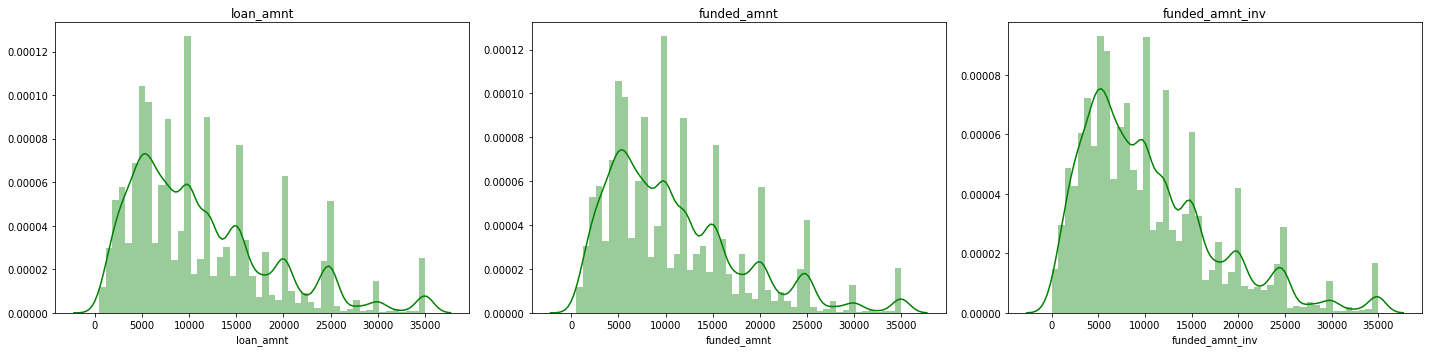

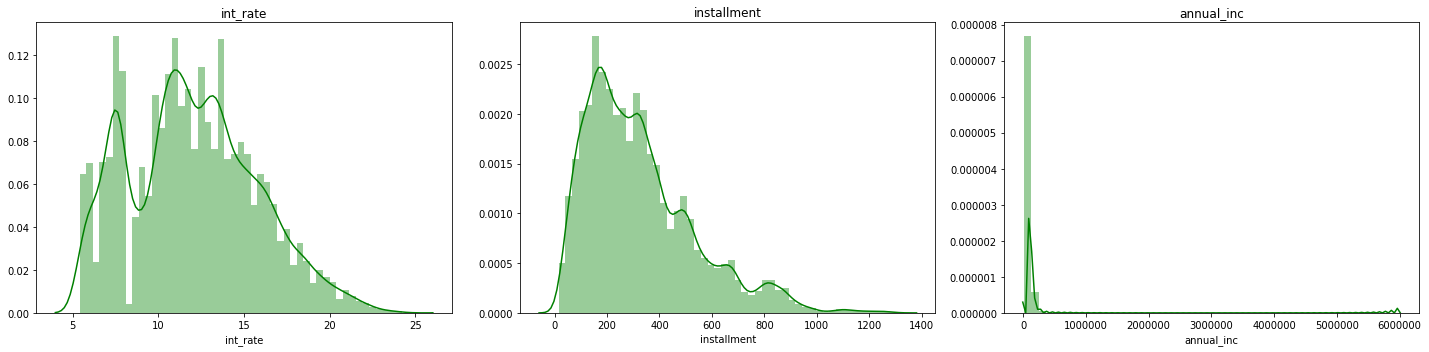

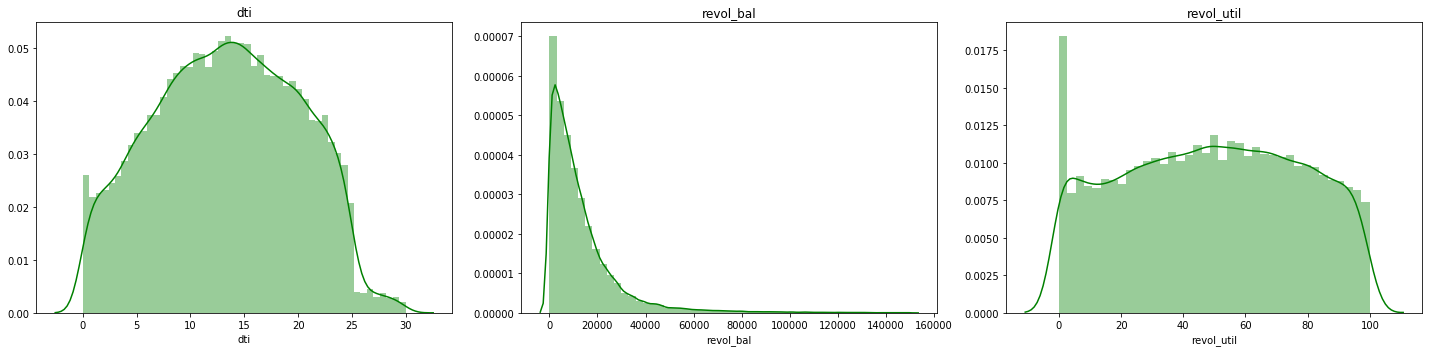

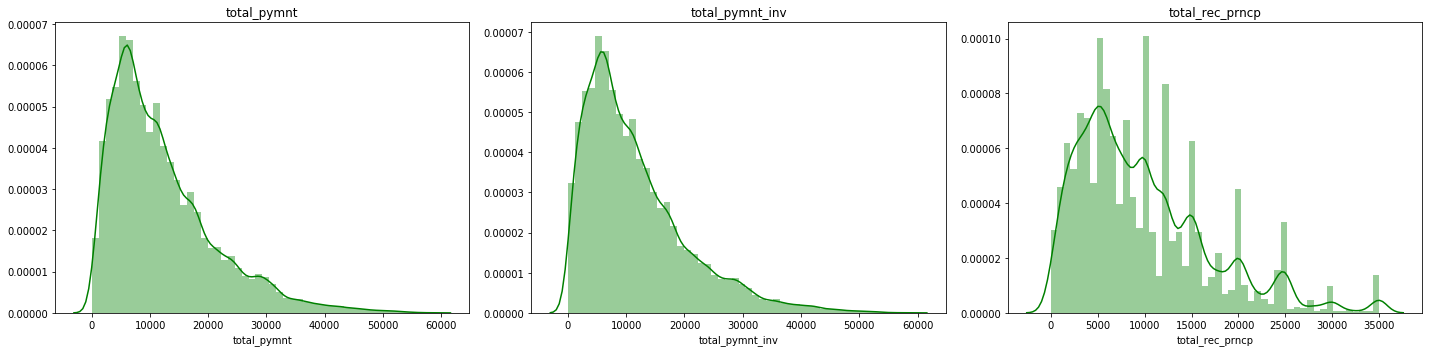

In [77]:
distributionPlot(loan_df,['loan_amnt','funded_amnt','funded_amnt_inv'])
distributionPlot(loan_df,['int_rate','installment','annual_inc'])
distributionPlot(loan_df,['dti','revol_bal','revol_util'])
distributionPlot(loan_df,['total_pymnt','total_pymnt_inv','total_rec_prncp'])

We can see from the distribution plot that loan_amnt, funded_amnt and funded_amt_inv has similar distribution.<br>
Income distribution is highly skewed toward the left.<br>
Most of the plots follows normal distribution.

##### Summary matrix for numerical columns

In [16]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,15000.00000,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,15000.00000,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,14400.00000,3.500000e+04
int_rate,39717.0,12.021177,3.724825,5.42,9.25,11.860000,14.59000,2.459000e+01
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,430.78000,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,82300.00000,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,18.60000,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.00000,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.00000,8.000000e+00
mths_since_last_delinq,39717.0,12.039882,21.965683,-1.00,-1.00,-1.000000,21.00000,1.200000e+02


#### Plotting Categorical Features

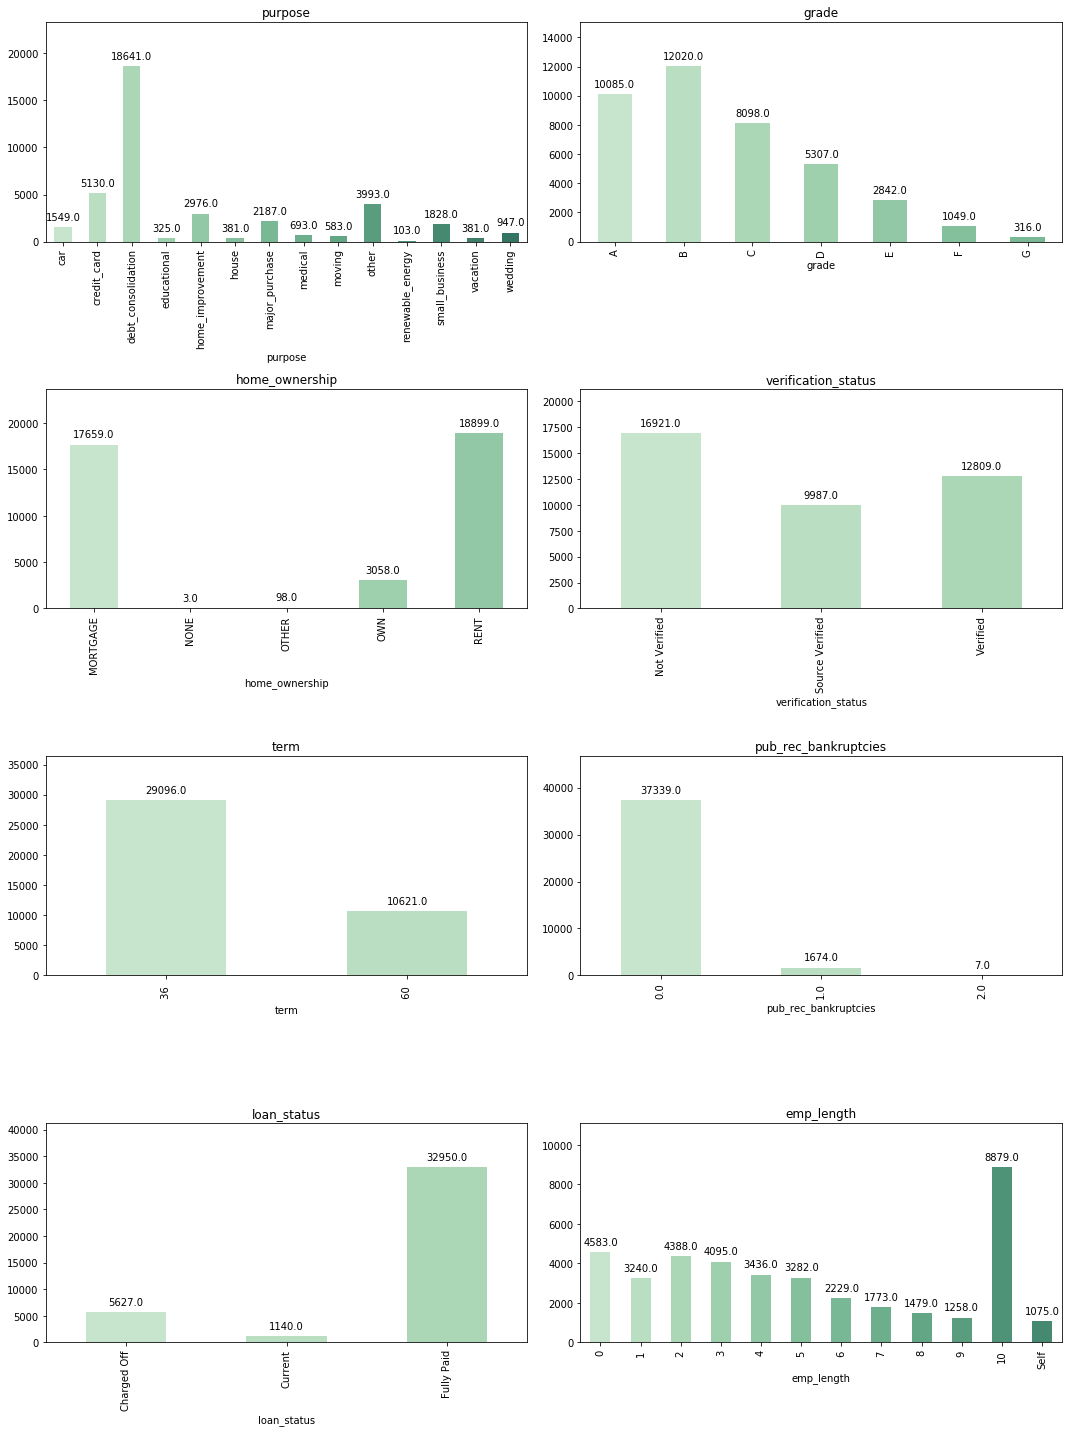

In [69]:
plt.figure(figsize=(15,20))
categoricalBarPlots(loan_df, ['purpose','grade','home_ownership','verification_status', 'term','pub_rec_bankruptcies',  'loan_status','emp_length'])

#### Univariate Analysis and Bivariate Analysis

We will be doing Univariate, Univariate Segmented Analysis and Bivariate Analysis of all relevant variables

#### 1. Loan Amount: 
Since loan_amnt, funded_amnt and funded_amnt_inv are almost similar, we will be working only on loan_amnt

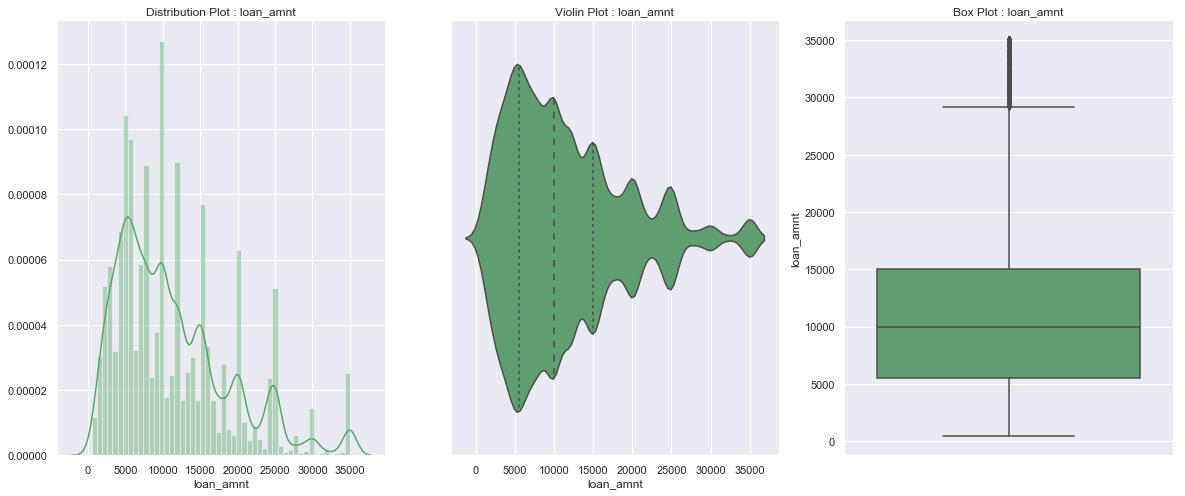

,loan_amnt
count,39717.000000
mean,11219.443815
std,7456.670694
min,500.000000
25%,5500.000000
50%,10000.000000
75%,15000.000000
max,35000.000000


In [98]:
univariate(loan_df,'loan_amnt')
loan_df[['loan_amnt']].describe()

In [106]:
# df=loan_df[loan_df.loan_amnt< loan_df.loan_amnt.quantile(0.90)]
# univariate(df,'loan_amnt')
# df[['loan_amnt']].describe()

#### Insigts: 
Most of the data points on Loan Amount is skewed towards the left side, means most loans are of lower amount, we can see spikes for round number loans like 5000,10000,15000,20000$ amount 

#### 2. Term : The number of payments on the loan. Values are in months and can be either 36 or 60.

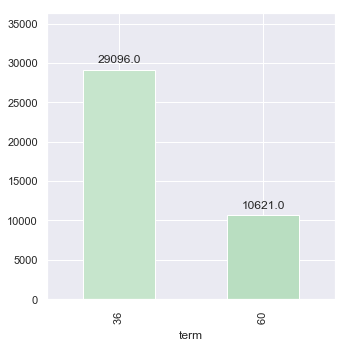

In [83]:
plt.figure(figsize=(5,5))
categoricalPlot(loan_df, ['term'])


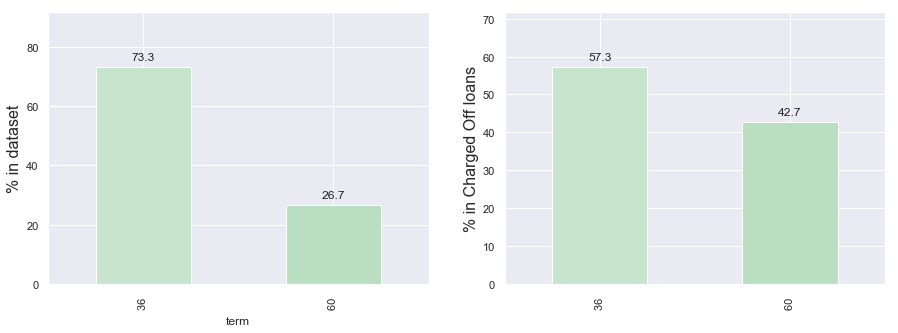

In [84]:
plt.figure(figsize=(15,5))
percentage(loan_df, 'term')

From this bar plot we can see that loans are either given for 3 year or 5 year duration. <br>
Around 30,000/74% loans are given for 3 years. <br>
Approximately 57% loans for 3 years are getting charged-off

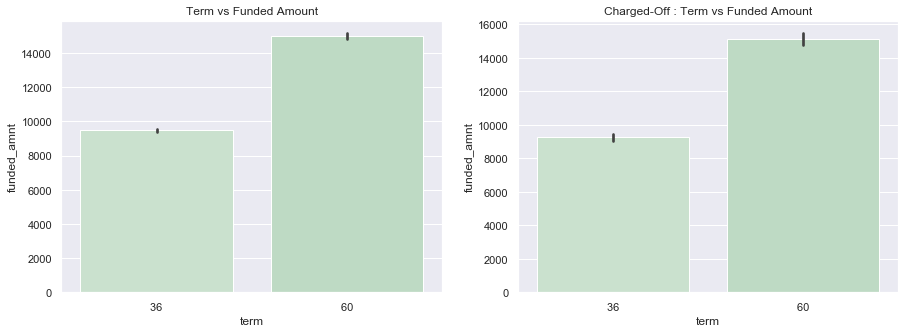

In [90]:
# Filtering the records with defaulted loans
loan_df_default = loan_df[loan_df.loan_status == 'Charged Off']

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.barplot(x= "term", y="funded_amnt", data=loan_df, palette =color)
plt.title('Term vs Funded Amount')

plt.subplot(1, 2, 2)
sns.barplot(x= "term", y="funded_amnt", data=loan_df_default, palette =color)
plt.title('Charged-Off : Term vs Funded Amount')
plt.show()



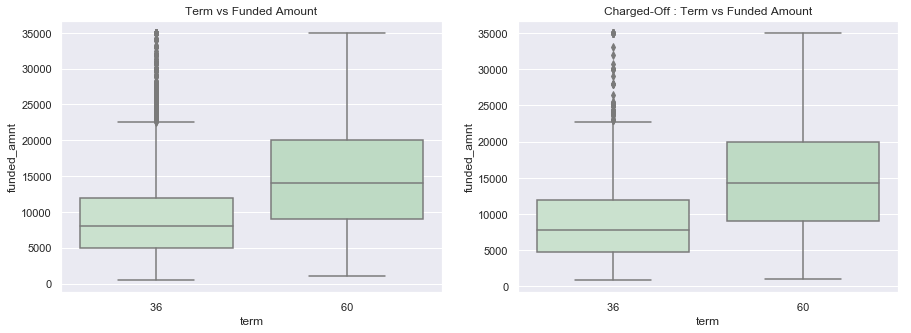

In [91]:
# Filtering the records with defaulted loans
loan_df_default = loan_df[loan_df.loan_status == 'Charged Off']

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x= "term", y="funded_amnt", data=loan_df, palette =color)
plt.title('Term vs Funded Amount')

plt.subplot(1, 2, 2)
sns.boxplot(x= "term", y="funded_amnt", data=loan_df_default, palette =color)
plt.title('Charged-Off : Term vs Funded Amount')
plt.show()



#### Insight:
Despite of having more number of loans given to 36 month term. More money is disbursed on 60 months term.
Although % of charged-off loan is higher in 36 month term but investors are loosing more money for 60 month term loan

#### 3. int_rate


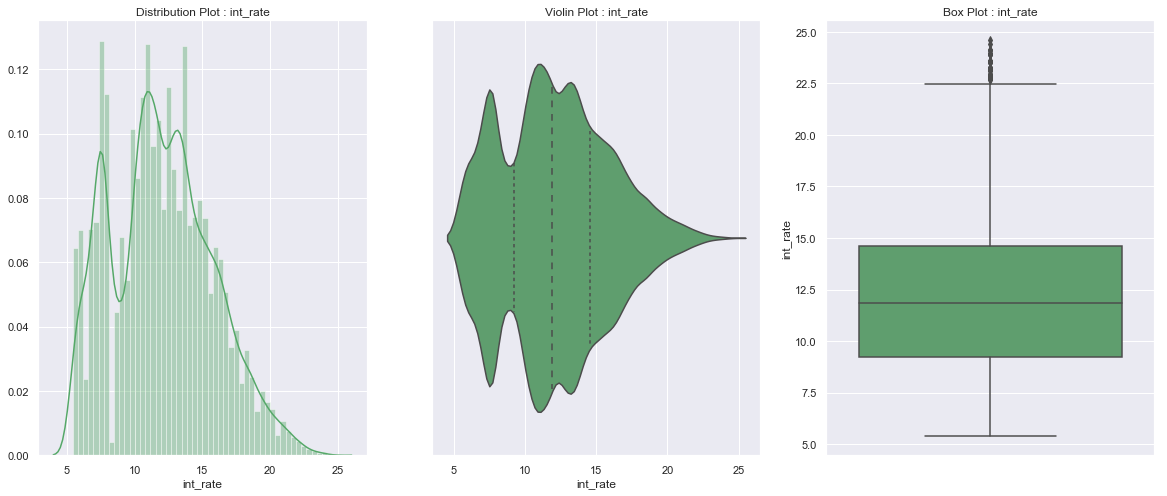

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [108]:
univariate(loan_df,'int_rate')
loan_df.int_rate.describe()

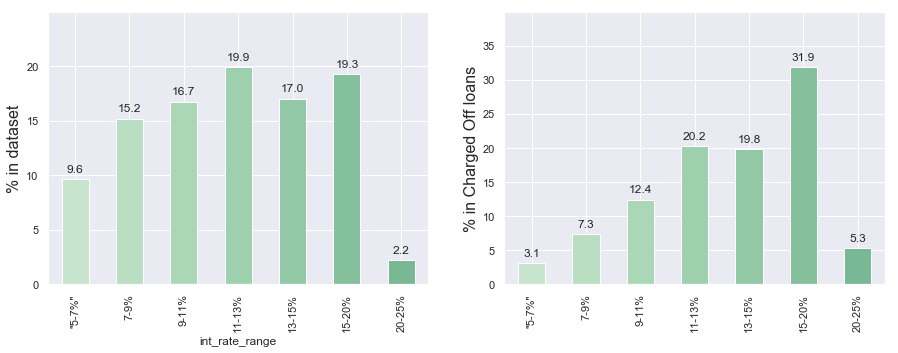

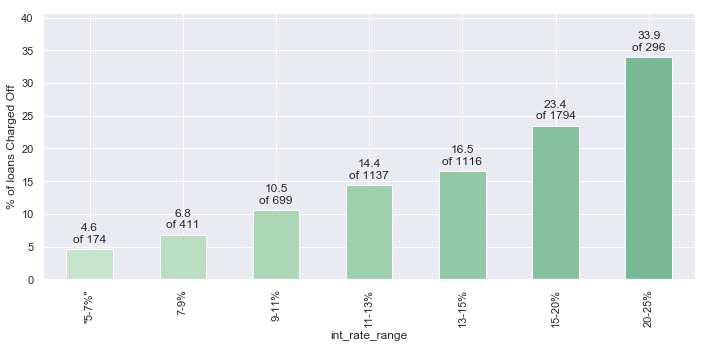

In [114]:
plt.figure(figsize=(15,5))
percentage(loan_df, 'int_rate_range', True)

plt.figure(figsize=(10,5))
ax = toatloan_status(loan_df,'int_rate_range')

#### Insights: <br>
Higher the interest rate for the loan, higher the probability of getting the loan charged-off

## Analysing debt-to-income ratio

A debt-to-income, or DTI, ratio is derived by dividing your monthly debt payments by your monthly gross income. The ratio is expressed as a percentage, and lenders use it to determine how well you manage monthly debts -- and if you can afford to repay a loan.



In [ ]:
# sns.set(rc={'figure.figsize':(10,6)})
# sns.distplot(loan_df['dti'])
univariate(loan_df,'dti')

Analysing dti vs Loan_status

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="loan_status", y="dti", data=loan_df)

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="status", y="dti", data=loan_df)

### Conclusion for dti Analysis
Initially when we started the analysis, dti (Debt to Income Ratio) seems like a very important factor, if debt to income ratio is more the customer is most likely to default the loan.

The fully paid loans has lower dti as the debt amount has decreased as the customer paid their debt.

Contrary, based on our analysis it seems like dti doesn't follow a pattern for good or bad loan.
We can see this trend based on the plots which are plotted against dti


## Analysing Loan by its purpose

Lets plot the following charts:
1. Number of Loan by its purpose
2. Loan Amount Distribution Pattern with Purpose
3. Interest Rate Distribution by purpose


In [ ]:
#1. Number of Loan by purpose
fig, ax = plt.subplots()

ax=sns.countplot(x='purpose', data=loan_df)
plt.xticks(rotation=90)

for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x()+0.05, p.get_height()+20))  


In [ ]:
colors =  [ "#fa5252","#52f4fa","#85fa52"]
my_palette = sns.color_palette(colors, desat=1)
#plt.figure(figsize=(16, 6))
fig, ax = plt.subplots(figsize=(16, 6))
ax=sns.countplot(x='purpose', data=loan_df.sort_values(by=['purpose','loan_status']), hue='loan_status',palette = my_palette)
plt.xticks(rotation=90)
# for p in ax.patches:
#     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_df))), (p.get_x()+0.05, p.get_height()+20)) 
#     ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
plt.show()

In [ ]:
purpose_df=loan_df[['loan_amnt','int_rate','installment','grade','purpose','status','loan_status','emp_length','dti']].sort_values(by='purpose')


Percentage of loan_status vs purpose

In [ ]:
t=purpose_df.groupby(by=['purpose']).count()['loan_amnt']
x=purpose_df.groupby(by=['purpose', 'status']).count()['loan_amnt']
purpose_percent_df = pd.DataFrame(round(x.div(t)*100,2) )
purpose_percent_df.columns = ['percentage']
purpose_percent_df.reset_index(inplace=True)

colors = [ "#fa5252","#52f4fa","#85fa52"]
my_palette = sns.color_palette(colors)
plt.figure(figsize=(16, 4))
splot = ax = sns.barplot(x="purpose", y="percentage", hue='status', data=purpose_percent_df, palette=my_palette,ci=None)
plt.xticks(rotation=90)
ax.legend(loc='center right', bbox_to_anchor=(1.12, .89), ncol=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

leg = splot.get_legend()
new_title = 'Loan Status'
leg.set_title(new_title)
new_labels = ['Bad Loan', 'Good Loan']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.show()


In [ ]:
grouped_df=purpose_df.groupby(by=['purpose', 'loan_status'])

colors = [ "#52f4fa","#85fa52","#fa5252"]
palette = sns.color_palette(colors)

colors = [ "#fa5252","#52f4fa","#85fa52"]
my_palette = sns.color_palette(colors)

fig, ax=plt.subplots(nrows =3,ncols=1,figsize=(18,20))
plt.subplots_adjust(hspace=0.8,top=0.8)
#plt.figure(figsize=(16, 4))
df=grouped_df.sum()[['loan_amnt']].reset_index()
ax[0] = sns.barplot(x="purpose", y="loan_amnt", hue='loan_status', data=purpose_df, palette=my_palette,ax=ax[0])
ax[0].legend(loc='center right', bbox_to_anchor=(1.12, .89), ncol=1)
ax[0].set_xticklabels( ax[0].get_xticklabels(), rotation=90)


#plt.figure(figsize=(16, 4))
ax[1] = sns.violinplot(x="purpose", y="loan_amnt", hue='loan_status', data=purpose_df, palette=my_palette,ax=ax[1])
ax[1].legend(loc='center right', bbox_to_anchor=(1.12, .89), ncol=1)
ax[1].set_xticklabels( ax[1].get_xticklabels(), rotation=90)


#plt.figure(figsize=(16, 4))
ax[2] = sns.boxplot(x="purpose", y="loan_amnt", hue='loan_status', data=purpose_df, palette=my_palette,ax=ax[2])
ax[2].legend(loc='center right', bbox_to_anchor=(1.12, .89), ncol=1)
ax[2].set_xticklabels( ax[2].get_xticklabels(), rotation=90)

plt.show()


In [ ]:
plt.figure(figsize=(16, 4))
ax = sns.boxplot(x="purpose", y="emp_length", hue='loan_status', data=purpose_df, palette=my_palette)
plt.xticks(rotation=90)
# Put a legend to the right side
ax.legend(loc='center right', bbox_to_anchor=(1.12, .89), ncol=1)
plt.show()

In [ ]:
plt.figure(figsize=(16, 4))
df=grouped_df.mean()[['int_rate']].reset_index()
ax = sns.violinplot(x="purpose", y="dti", hue='loan_status', data=purpose_df, palette=my_palette)
plt.xticks(rotation=90)
# Put a legend to the right side
ax.legend(loc='center right', bbox_to_anchor=(1.12, .89), ncol=1)
plt.show()

### Conclusion for Purpose Analysis

Around 50% of loans are taken for Debt Consolidation, i.e. with this borrowed money the customers want to preclose all other loans.
<br>Higher Loan Amount are taken for Debt Consolidation and small business.
<br>Around 25% loans taken for Small Business defaults

In [ ]:
corr=num_df.corr()
sns.set(style="white")



# Generate a mask for the upper triangle
mask = np.ones_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = False


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr

## Analysis on Open and Total Number of Account
open_acc	The number of open credit lines in the borrower's credit file.<br>
total_acc	The total number of credit lines currently in the borrower's credit file


In [ ]:
plt.figure(figsize=(16, 4))
ax = sns.hist(y="loan_amnt", x="open_acc", hue='loan_status', data=loan_df, palette=my_palette)
plt.xticks(rotation=90)
# Put a legend to the right side
ax.legend(loc='center right', bbox_to_anchor=(1.12, .89), ncol=1)
plt.show()

In [ ]:

#.loan_status.astype('category').cat.codes